In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import pandas as pd
from tinydb import TinyDB, Query
from config import *

In [2]:
db = TinyDB(DB_FILE)
processed_table = db.table(TABLE_PROCESSED)

In [17]:
data = processed_table.all() 
df = pd.DataFrame(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              444 non-null    object 
 1   min_salary         52 non-null     float64
 2   max_salary         41 non-null     float64
 3   salary_currency    63 non-null     object 
 4   minimum_education  444 non-null    object 
 5   languages          444 non-null    object 
 6   experience         289 non-null    float64
 7   responsibilities   444 non-null    object 
 8   hard_skills        444 non-null    object 
 9   soft_skills        444 non-null    object 
 10  certifications     444 non-null    object 
 11  benefits           444 non-null    object 
 12  city               299 non-null    object 
 13  country            313 non-null    object 
 14  company_name       444 non-null    object 
 15  company_size       183 non-null    object 
 16  employment_type    444 non

,title,min_salary,max_salary,salary_currency,minimum_education,languages,experience,responsibilities,hard_skills,soft_skills,...,company_size,employment_type,work_schedule,contract_type,remote_work,job_categories,date,source,occurrences,original_url
0,dotnet developer,NaN,NaN,None,none,[ro],2.0,[],[dotnet],[],...,None,full-time,None,None,on-site,[programming],30/05/2025,robota.md,"[31/05/2025, 30/05/2025]",https://www.rabota.md/ro/joburi/middle-net-dev...
1,golang developer,NaN,NaN,None,none,[en],3.0,"[traffic processing, ensure stability, design ...","[golang, http, https, multithreading, sql, gra...","[teamwork, problem solving]",...,None,full-time,flexible,permanent,hybrid,[programming],30/05/2025,robota.md,"[31/05/2025, 30/05/2025]",https://www.rabota.md/ro/locuri-de-munca/middl...
2,1c programmer,NaN,NaN,None,bachelor,"[ro, ru]",1.0,[],[1c],[],...,None,full-time,standard,permanent,on-site,[programming],30/05/2025,robota.md,"[31/05/2025, 30/05/2025]",https://www.rabota.md/ro/locuri-de-munca/progr...
3,ios developer,NaN,NaN,None,unspecified,"[ro, ru]",1.0,"[develop, maintain, optimize, collaborate, debug]","[swift, swiftui, cocoapods, git, oop, mvc, mvv...",[],...,None,full-time,standard,permanent,on-site,[programming],30/05/2025,robota.md,"[31/05/2025, 30/05/2025]",https://www.rabota.md/ro/locuri-de-munca/ios-d...
4,devops engineer,NaN,NaN,None,none,[en],3.0,"[analyze, design, develop, build, test, deploy...","[aws, amazon cloudwatch, azure, cicd, docker, ...",[],...,None,full-time,standard,permanent,on-site,[programming],30/05/2025,robota.md,"[31/05/2025, 30/05/2025]",https://www.rabota.md/ro/locuri-de-munca/devop...


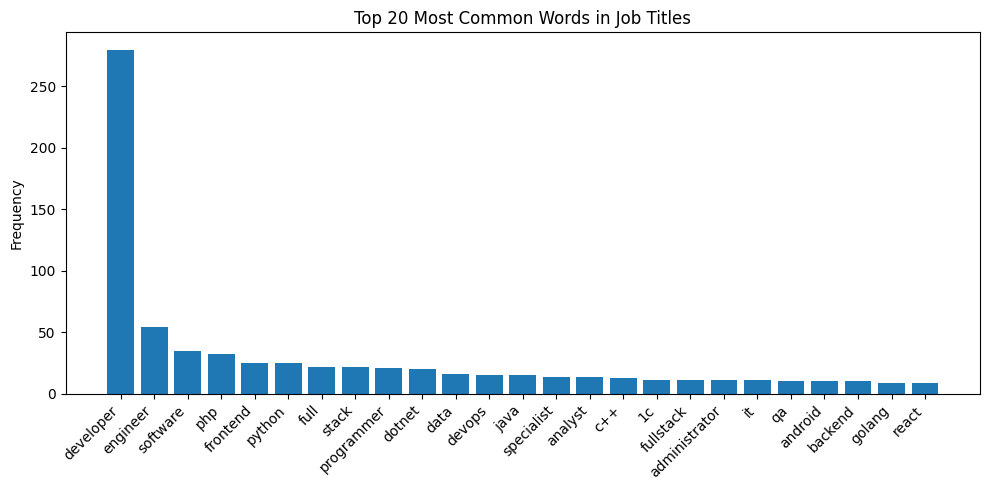

Full list of word frequencies:

developer            280
engineer             54
software             35
php                  32
frontend             25
python               25
full                 22
stack                22
programmer           21
dotnet               20
data                 16
devops               15
java                 15
specialist           14
analyst              14
c++                  13
1c                   11
fullstack            11
administrator        11
it                   11
qa                   10
android              10
backend              10
golang               9
react                9
web                  9
ai                   8
development          8
net                  8
ios                  7
full-stack           7
technical            6
support              6
business             6
front                5
end                  5
javascript           5
network              5
lead                 5
system               5
flutter              5
i

In [18]:
# most common words in job titles

# Flatten all words into a single list
all_words = [word for title in df['title'].dropna() for word in title.split()]

# Count occurrences
word_counts = Counter(all_words)

# Plot top 20 most common words
top_words = dict(word_counts.most_common(25))
plt.figure(figsize=(10, 5))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 Most Common Words in Job Titles')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# Print full list sorted by frequency
print("Full list of word frequencies:\n")
for word, count in word_counts.most_common():
    print(f"{word:20} {count}")

In [19]:
# Raw, non processed titles
# Get the value counts of the 'title' column
title_counts = df['title'].value_counts()

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)

# Display all job title occurrences
print("All Job Title Occurrences:")
print(title_counts)

All Job Title Occurrences:
title
php developer                        28
frontend developer                   22
python developer                     21
full stack developer                 20
software developer                   20
java developer                       15
c++ developer                        13
dotnet developer                     13
devops engineer                      12
1c programmer                        11
android developer                    10
software engineer                     9
backend developer                     8
golang developer                      8
web developer                         8
full-stack developer                  7
ios developer                         7
data engineer                         6
front end developer                   5
react native developer                5
fullstack developer                   5
net developer                         5
javascript developer                  4
flutter developer                     4
data an

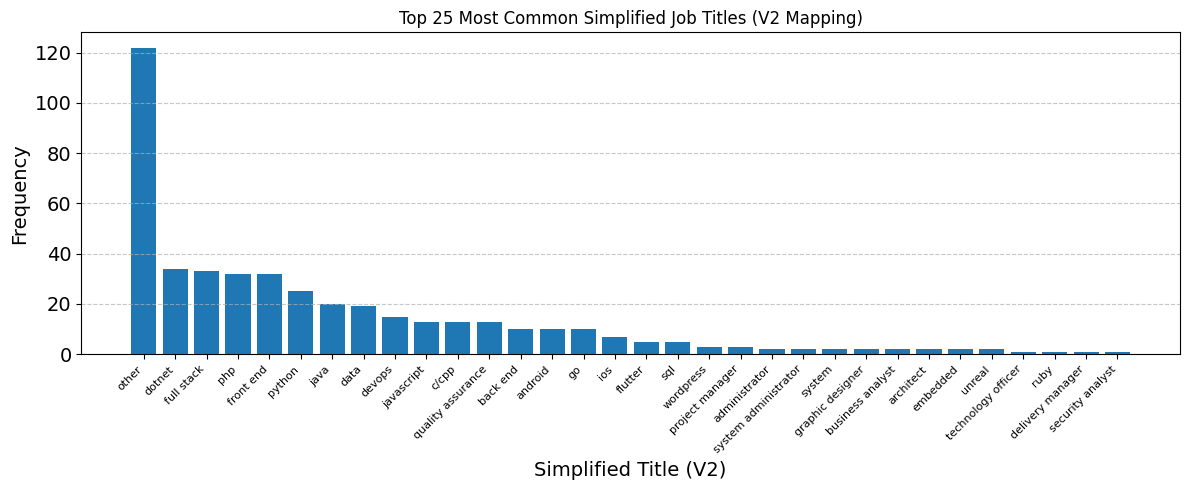


All Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):
simplified_title_reordered_v2
other                   122
dotnet                   34
full stack               33
php                      32
front end                32
python                   25
java                     20
data                     19
devops                   15
javascript               13
c/cpp                    13
quality assurance        13
back end                 10
android                  10
go                       10
ios                       7
flutter                   5
sql                       5
wordpress                 3
project manager           3
administrator             2
system administrator      2
system                    2
graphic designer          2
business analyst          2
architect                 2
embedded                  2
unreal                    2
technology officer        1
ruby                      1
delivery manager         

In [ ]:
# Cherry Pick with regex best words

# 1. Define dictionary with keyword / simplified titles you expect (priority matters implicitly by order)
JOB_KEYWORD_MAPPING_REORDERED_V2 = {
    # Programming Languages (Prioritized and ordered by perceived commonality/specificity)
    'python': r'python',
    'kotlin': r'kotlin',
    'java': r'java|full stack java|spring',
    'dotnet': r'\.net|dot[-\s]?net|net|asp\.net|aspdotdotnet|dotnetwork|dotdotnet|csharp/dotdotnet|aspdotdotnet dotdotnet|dotdotnet core|dotdotnet developers|c#|c[-\s]?sharp|csharp|asp\.net|dotdotnet',
    'javascript': r'node\.?js|nodejavascript|reactjs|react|react native|angularjs|angular|vue.javascript|vue.js', # Combining related JS frameworks
    'php': r'php symfony|php',
    'go': r'golang|go',
    'rust': r'rust',
    'swift': r'swift',
    'haskel': r'haskel|lisp',
    'ruby': r'ruby|rails', # Assuming Rails is specific to Ruby
    'c/cpp': r'c\+\+|c/cpp',
    'sql': r'sql|oracle|microsoft dynamics', # Databases related to programming

    # Mobile Development
    'ios': r'ios',
    'android': r'android',
    'flutter': r'flutter/dart|flutter',

    # Front-End and Back-End (Full Stack below)
    'front end': r'front[-\s]?end',
    'back end': r'back[-\s]?end|dotdotnet back end|back end nodejavascript',
    'full stack': r'full[-\s]?stack|full stack web|full stack web development|full stack development|arhitect full stack|dezvoltator full stack|full stack php|full stack dotdotnet',

    # Quality Assurance
    'quality assurance': r'qa|quality assurance|quality assurance analyst|automation quality assurance|quality assurance tester|tester',

    # Data Related
    'data': r'data analyst|data|data analyst data scientist|etl data tester|data steward',

    # DevOps and System Administration
    'devops': r'devops|azure devops|system devops',
    'system administrator': r'system administrator|linux dotnetwork administrator|system administrator helpdesk|web administrator',
    'linux administrator': r'linux',
    'monitoring operator': r'monitoring operator',
    'infrastructure support': r'infrastructure support',
    'system': r'system|linux dotnetwork system administrator',

    # Management/Leadership
    'project manager': r'project manager|software project manager',
    'product manager': r'product manager',
    'technology officer': r'technology officer',
    'delivery manager': r'delivery manager',
    'team lead': r'team lead', # Assuming this was a desired category (not in original, but often relevant)
    'architect': r'architect',

    # Analysis and Design
    'business analyst': r'business analyst|business analyst project coordinator',
    'ui ux designer': r'ui[/]?ux',
    'erp analyst': r'erp analyst',
    'market research analyst': r'market research analyst',
    'graphic designer': r'grafic designer|graphic designer|designer',
    'artist': r'artist',

    # Other Technical Roles
    'embedded': r'embedded|mcu',
    'unreal': r'unreal engine|unreal game |unrealdeveloper',
    'security analyst': r'security analyst',
    'cybersecurity': r'cybersecurity',
    'site reliability': r'site reliability',
    'mobile application': r'mobile application', # Keeping it here as it's a type of application
    'web': r'веб|веб-программист|web designer', # Broader web category
    'r&d': r'r&d',
    'wordpress': r'wordpress', # Could be web development, but often distinct
    'administrator': r'administrator', # Very general
        
    'UNKNOWN': 'other', # Default category if no keyword is found
}

def categorize_title_reordered_v2(title):
    """
    Passes through the job title and categorizes it based on the reordered
    predefined keywords with programming languages on top, full stack below
    front/back end, and iOS/Android higher.
    """
    if isinstance(title, str):
        processed_title = title.lower().strip()
        processed_title = re.sub(r'\([^)]*\)', '', processed_title).strip() # Remove parentheses content

        for category, pattern in JOB_KEYWORD_MAPPING_REORDERED_V2.items():
            if re.search(pattern, processed_title):
                return category
        return 'other'
    return 'other'

# Apply the reordered categorization function (version 2)
if 'simplified_title_reordered_v2' not in df.columns:
    df['simplified_title_reordered_v2'] = df['title'].apply(categorize_title_reordered_v2)

# Get the value counts of the prioritized simplified titles (version 2)
simplified_title_counts_reordered_v2 = df['simplified_title_reordered_v2'].value_counts()

plt.figure(figsize=(12, 5))
plt.bar(simplified_title_counts_reordered_v2.index, simplified_title_counts_reordered_v2.values)
plt.title('Top 25 Most Common Simplified Job Titles (V2 Mapping)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Simplified Title (V2)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Display all prioritized simplified job title occurrences (version 2)
print("\nAll Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):")
print(simplified_title_counts_reordered_v2)

# remove other keyword
del simplified_title_counts_reordered_v2["other"]


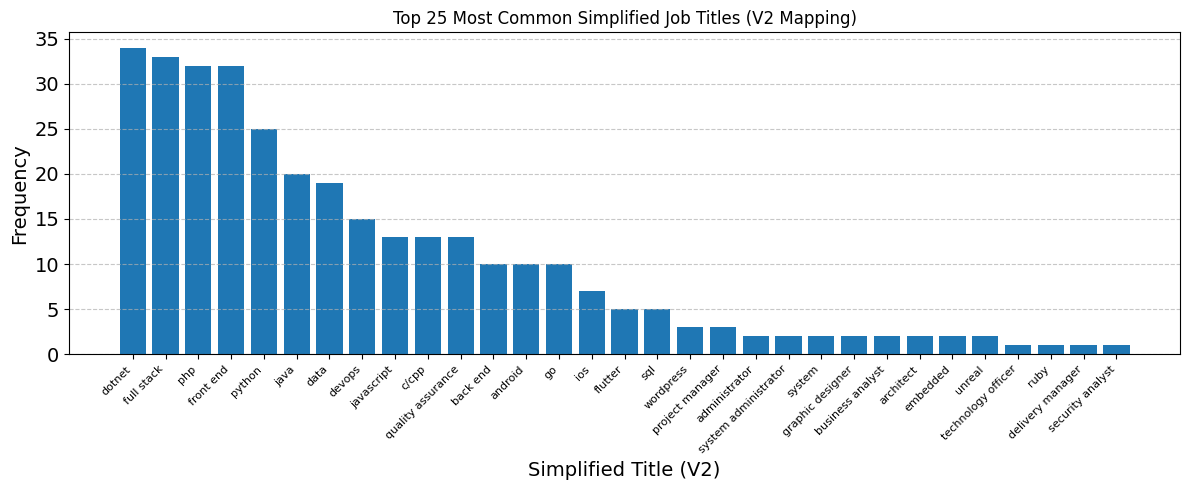